In [3]:
import numpy as np
import math
import array as arr
import matplotlib.pyplot as plt
import csv
import statistics

In [4]:
data = np.genfromtxt('TOTAL.a.csv',skip_footer=1, names=True, dtype=None, delimiter=',')

C:\Users\katel\AppData\Local\Temp\ipykernel_19284\3209501774.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt('TOTAL.a.csv',skip_footer=1, names=True, dtype=None, delimiter=',')


In [5]:
cut = (data['TDR']>11) & (data['V_HEL']>80)

In [6]:
nbins = int((np.max(data['MG_FE'])+0.05 - np.min(data['MG_FE'])-0.05)/0.05)
print(nbins)

15


In [7]:
data.dtype

dtype([('2MASS_ID', 'S19'), ('RA', 'S7'), ('DEC', 'S12'), ('RAd', '<f8'), ('DEd', '<f8'), ('GL', '<f8'), ('GB', '<f8'), ('UTD', 'S9'), ('FILE', 'S35'), ('V_HEL', '<f8'), ('TDR', '<f8'), ('CORR', '<f8'), ('E_RV', '<f8'), ('SIGMA', '<f8'), ('NUM', '<i4'), ('CA1', '<f8'), ('E_CA1', '<f8'), ('CA2', '<f8'), ('E_CA2', '<f8'), ('CA3', '<f8'), ('E_CA3', '<f8'), ('RA2', 'S7'), ('2Dec', 'S12'), ('tmpR', '<f8'), ('Lambda', '<i4'), ('Beta', '<i4'), ('V_LSR', '<f8'), ('V_GSR', '<f8'), ('RA3', '<f8'), ('3Dec', '<f8'), ('J', '<f8'), ('H', '<f8'), ('K', '<f8'), ('E_J', '<f8'), ('E_H', '<f8'), ('E_K', '<f8'), ('rdflg', '<i4'), ('ccflg', 'S3'), ('phqu', 'S3'), ('prx', '<f8'), ('2Mdate', 'S10'), ('d_opt', '<f8'), ('p_opt', '<i4'), ('a', 'S1'), ('ermaj', '<f8'), ('id', '<i4'), ('R', '<f8'), ('ER', '<f8'), ('2MASS', 'S16'), ('RA4', 'S7'), ('4Dec', 'S12'), ('JNK1', '<f8'), ('JNK2', '<f8'), ('JNK3', '<f8'), ('JNK4', '<f8'), ('JNK5', '<f8'), ('JNK6', '<f8'), ('JNK7', '<f8'), ('JNK8', '<f8'), ('JNK9', '<f8'), 

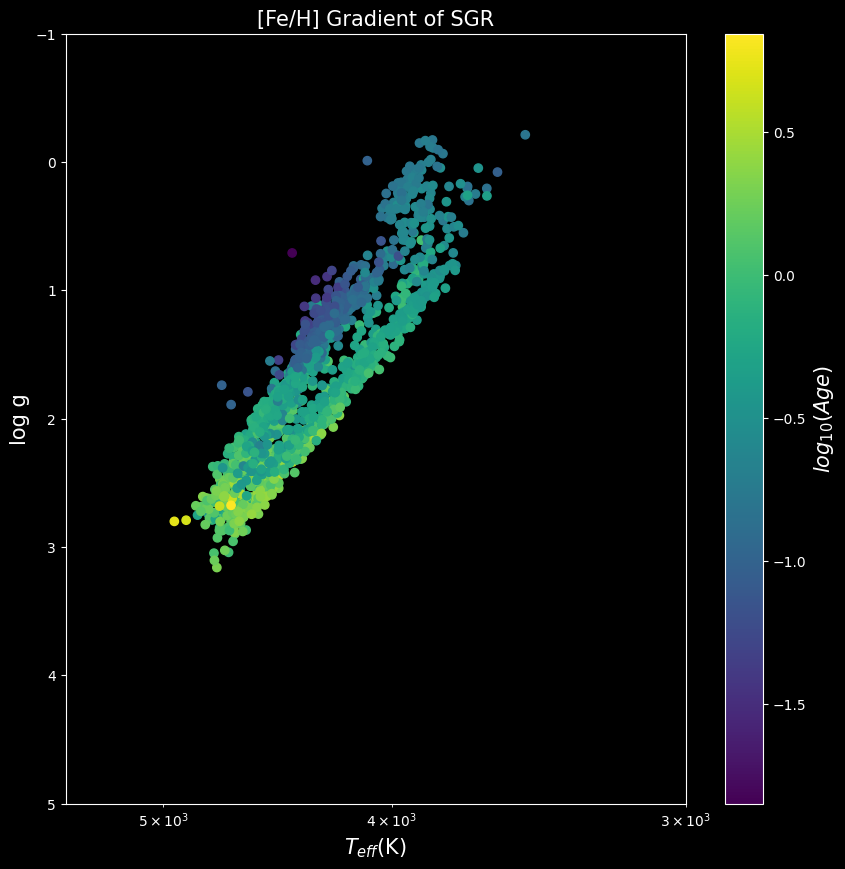

In [8]:
#plot the fe/h 
plt.style.use('dark_background')
fig = plt.figure(figsize=(10,10))

x=plt.scatter(data['TEFF'], data['LOGG'], c= data['FE_H'], cmap='viridis', marker="o")
plt.xlabel('$T_{eff}$(K)', size=15)
plt.ylabel('log g', size=15)
plt.title('[Fe/H] Gradient of SGR', size=15)
bar = fig.colorbar(x)
bar.set_label('$log_{10} (Age)$', size=15)

plt.xscale('log')
plt.xlim([5.5e3,3e3])
plt.ylim([5,-1])


plt.savefig('HR.png', bbox_inches='tight')
plt.show()

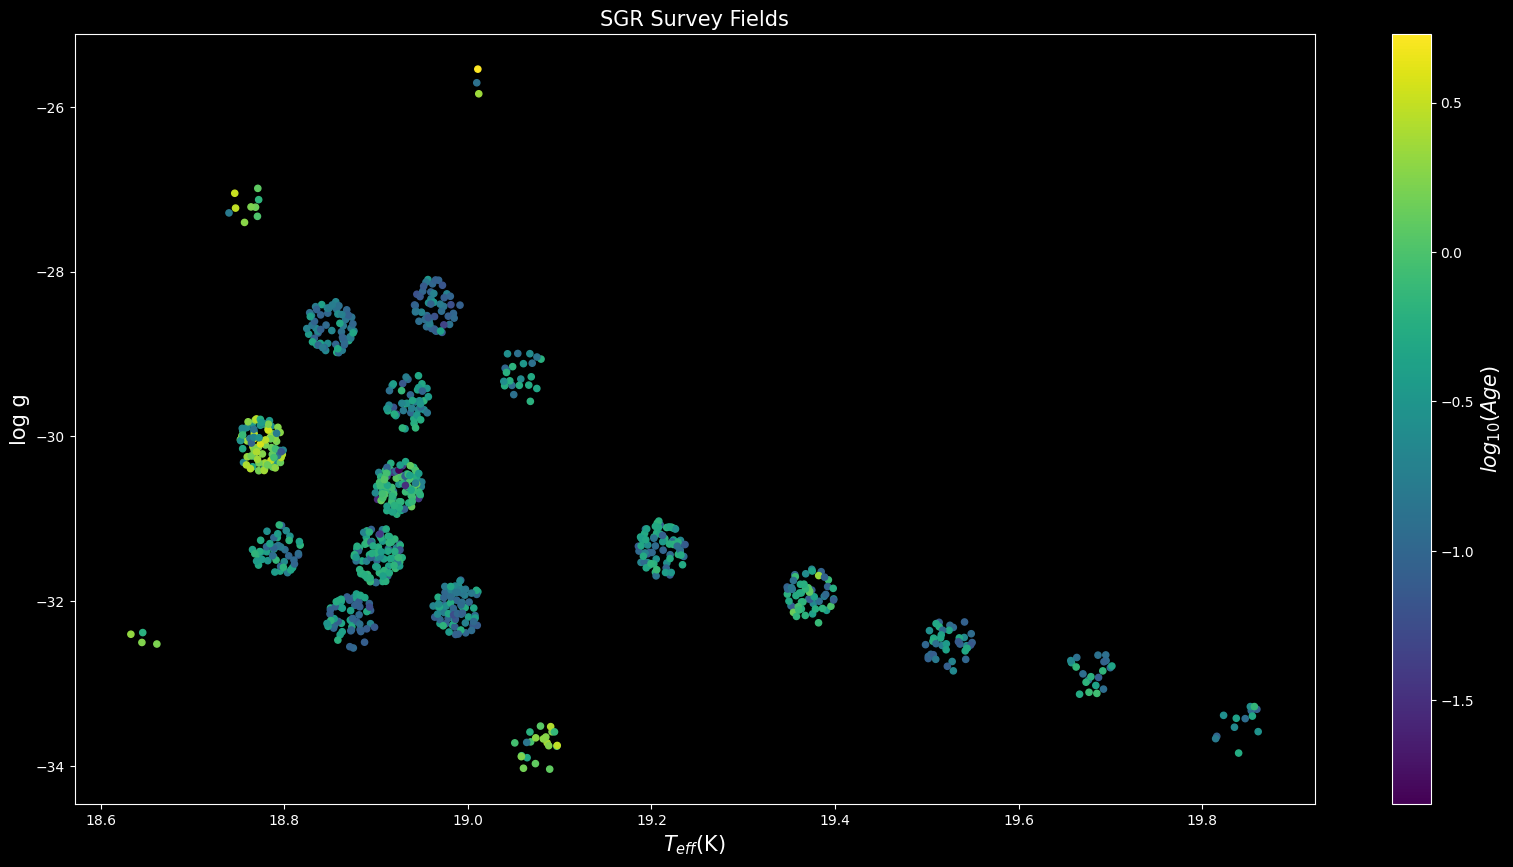

In [9]:
#plot SGR w/o irrelevant data atcorrespondong RA and DEC points 
plt.style.use('dark_background')
fig = plt.figure(figsize=(20,10))

x=plt.scatter(data['RAd'][cut], data['DEd'][cut], c= data['FE_H'][cut], s=20, cmap='viridis',marker="o")
plt.xlabel('$T_{eff}$(K)', size=15)
plt.ylabel('log g', size=15)
plt.title('SGR Survey Fields', size=15)

bar = fig.colorbar(x)
bar.set_label('$log_{10} (Age)$', size =15)
plt.savefig('Survey Fields.png',bbox_inches='tight')

plt.show()

In [10]:
major00 = (data['MAJOR'] == 0) & (data['MINOR'] == 0)
m00 = data['FE_H'][major00]
major00_mean = np.mean(m00)

major02 = (data['MAJOR'] == 2) & (data['MINOR'] == 0)
m02 = data['FE_H'][major02]
major02_mean = np.mean(m02)

major04 = (data['MAJOR'] == 4 ) & (data['MINOR'] == 0)
m04 = data['FE_H'][major04]
major04_mean = np.mean(m04)

major06 = (data['MAJOR'] == 6) & (data['MINOR'] == 0)
m06 = data['FE_H'][major06]
major06_mean = np.mean(m06)

major08 = (data['MAJOR'] == 8 ) & (data['MINOR'] == 0)
m08 = data['FE_H'][major08]
major08_mean = np.mean(m08)

major10 = (data['MAJOR'] == 10 ) & (data['MINOR'] == 0)
m10 = data['FE_H'][major10]
major10_mean = np.mean(m10)

major12 = (data['MAJOR'] == 12 ) & (data['MINOR'] == 0)
m12 = data['FE_H'][major12]
major12_mean = np.mean(m12)

minor_01= (data['MAJOR'] == 0) & (data['MINOR'] == 1)
m_01 = data['FE_H'][minor_01]
minor_01_mean = np.mean(m_01)

minor_02= (data['MAJOR'] == 0) & (data['MINOR'] == 2)
m_02 = data['FE_H'][minor_02]
minor_02_mean = np.mean(m_02)

minor_05= (data['MAJOR'] == 0) & (data['MINOR'] == 5)
m_05 = data['FE_H'][minor_05]
minor_05_mean = np.mean(m_05)

major_m_02 = (data['MAJOR'] == -2) & (data['MINOR'] == 0)
mm_02 = data['FE_H'][major_m_02]
major_m_02_mean = np.mean(mm_02)

minor_m_01= (data['MAJOR'] == 0) & (data['MINOR'] == -1)
m_m01 = data['FE_H'][minor_m_01]
minor_m_01_mean = np.mean(m_m01)

minor_m_02= (data['MAJOR'] == 0) & (data['MINOR'] == -2)
m_m02 = data['FE_H'][minor_m_02]
minor_m_02_mean = np.mean(m_m02)

minor_m_03= (data['MAJOR'] == 0) & (data['MINOR'] == -3)
m_m03 = data['FE_H'][minor_m_03]
minor_m_03_mean = np.mean(m_m03)

SW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == -2)
SW4 = data['FE_H'][SW_04]
SW_04_mean = np.mean(SW4)

NW_04 = (data['MAJOR'] == -2) & (data['MINOR'] == 2)
NW4 = data['FE_H'][NW_04]
NW_04_mean = np.mean(NW4)

SE_04 = (data['MAJOR'] == 2) & (data['MINOR'] == -2)
SE4 = data['FE_H'][SE_04]
SE_04_mean = np.mean(SE4)

NE_02 = (data['MAJOR'] == 1.4) & (data['MINOR'] == 1.4)
NE2 = data['FE_H'][NE_02]
NE_02_mean = np.mean(NE2)

SW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == -1.4)
SW2 = data['FE_H'][SW_02]
SW_02_mean = np.mean(SW2)

NW_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
NW2 = data['FE_H'][NW_02]
NW_02_mean = np.mean(NW2)

SE_02 = (data['MAJOR'] == -1.4) & (data['MINOR'] == 1.4)
SE2 = data['FE_H'][SE_02]
SE_02_mean = np.mean(SE2)


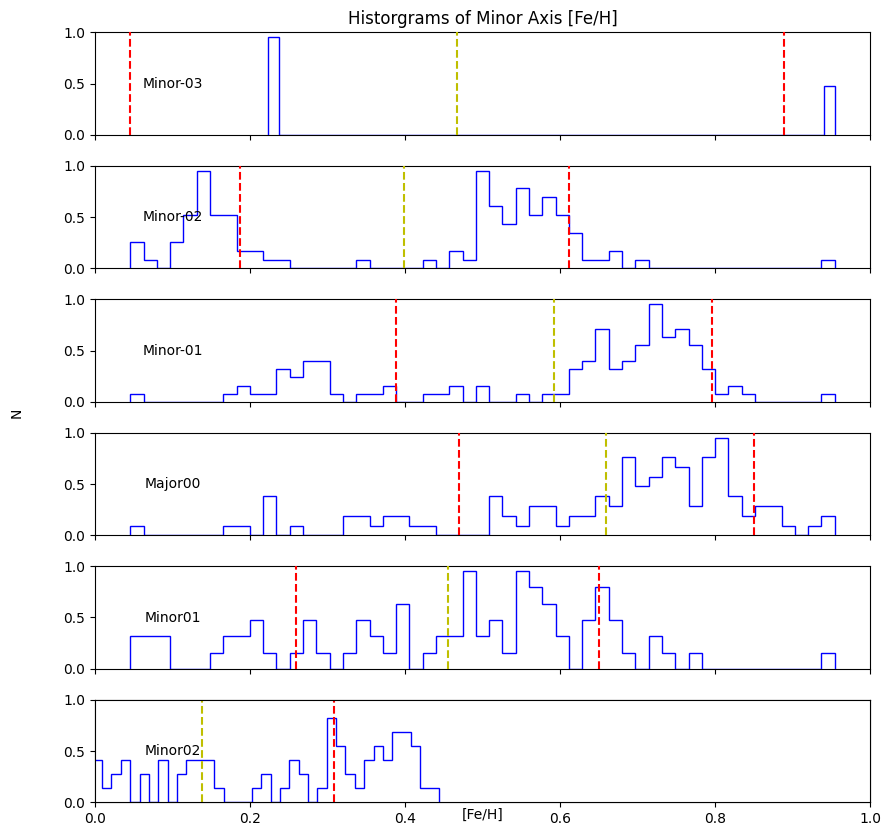

In [11]:
#plot the histograms
plt.style.use('default')
fig, axes = plt.subplots(6, 1, figsize=(10,10), sharex=1)
fig.subplots_adjust(hspace=0.3, wspace=0.0)

ax1 = fig.add_subplot(6,1,1)
ax1.hist(m_m03,bins=53, histtype='step', color='b')
ax1.text(0.1, 0.5, 'Minor-03', 
         horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)
#ax1.set_ylabel('N')
ax1.set_xlabel('[FE/H]')
ax1.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m_m03)

plt.axvline(minor_m_03_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_03_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_03_mean + sd, c='r', linestyle='dashed')
###################################################################################
ax2 = fig.add_subplot(6,1,2)
ax2.hist(m_m02,bins=53, histtype='step', color='b')
ax2.text(0.1, 0.5, 'Minor-02', 
         horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)
#ax2.set_ylabel('N')
ax2.set_xlabel('[FE/H]')
ax2.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m_m02)

plt.axvline(minor_m_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_02_mean + sd, c='r', linestyle='dashed')

#############################################################################################
#plot the histograms

ax3 = fig.add_subplot(6,1,3)
ax3.hist(m_m01,bins=53, histtype='step', color='b')
ax3.text(0.1, 0.5, 'Minor-01', 
         horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)
#ax3.set_ylabel('N')
ax3.set_xlabel('[FE/H]')
ax3.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m_m01)

plt.axvline(minor_m_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_m_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_m_01_mean + sd, c='r', linestyle='dashed')
#################################################################################################
ax4 = fig.add_subplot(6,1,4)
ax4.hist(m00,bins=53, histtype='step', color='b')
ax4.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)
#ax4.set_ylabel('N')
ax4.set_xlabel('[FE/H]')
ax4.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#####################################################################################################
#plot the histograms

ax5 = fig.add_subplot(6,1,5)
ax5.hist(m_01,bins=53, histtype='step', color='b')
ax5.text(0.1, 0.5, 'Minor01', 
         horizontalalignment='center', verticalalignment='center', transform=ax5.transAxes)
#ax5.set_ylabel('N')
ax5.set_xlabel('[FE/H]')
ax5.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m_01)

plt.axvline(minor_01_mean, c='y', linestyle='dashed')
plt.axvline(minor_01_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_01_mean + sd, c='r', linestyle='dashed')
#######################################################################################
#plot the histograms

ax6 = fig.add_subplot(6,1,6)
ax6.hist(m_02,bins=53, histtype='step', color='b')
ax6.text(0.1, 0.5, 'Minor02', 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
#ax6.set_ylabel('N')
ax6.set_xlabel('[Fe/H]')

#standard deviatian and mean
sd = statistics.stdev(m_01)

plt.axvline(minor_02_mean, c='y', linestyle='dashed')
plt.axvline(minor_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(minor_02_mean + sd, c='r', linestyle='dashed')


ax6.set_xlim(-1, 1) 
ax6.set_xticks([])

ax1.set_title('Historgrams of Minor Axis [Fe/H]')
fig.text(0.04, 0.5, 'N', va='center', rotation='vertical')

ax1.set_yticks([])
ax2.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
ax4.set_yticks([])
ax5.set_yticks([])
ax6.set_yticks([])

plt.savefig('Histogram of Minor Axis.png',bbox_inches='tight')


plt.show()


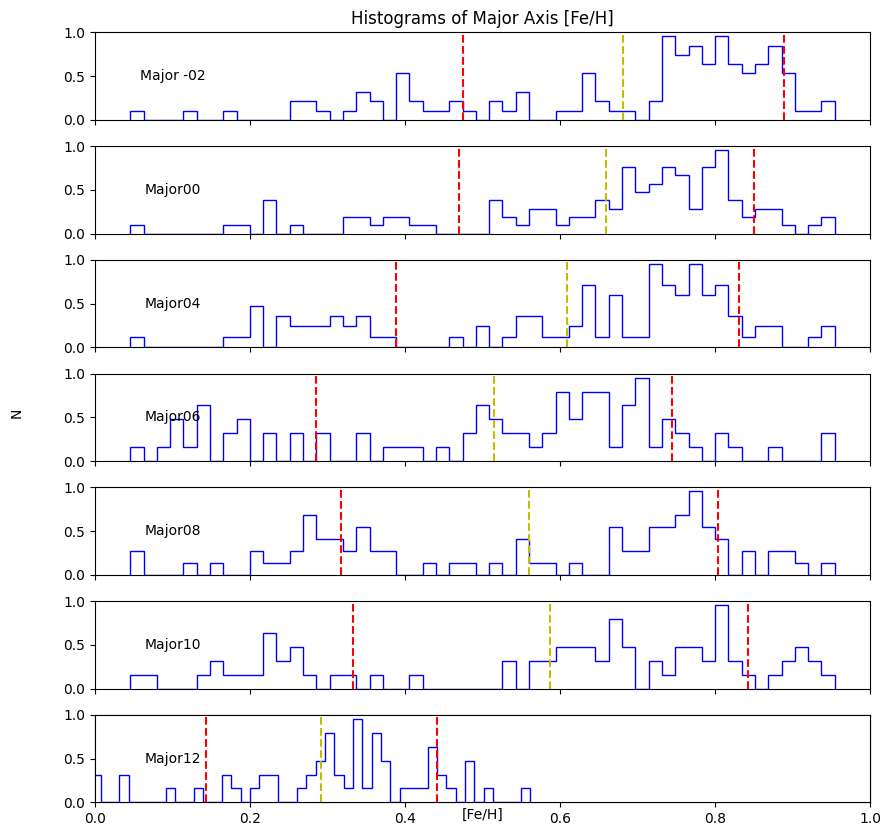

In [12]:
#plot the histograms
plt.style.use('default')
fig, axes = plt.subplots(7, 1, figsize=(10,10), sharex=1)
fig.subplots_adjust(hspace=0.3, wspace=0.0)
###################################################################################

#####################################################################################################

ax6 = fig.add_subplot(7,1,1)
ax6.hist(mm_02,bins=53, histtype='step', color='b')
ax6.text(0.1, 0.5, 'Major -02', 
         horizontalalignment='center', verticalalignment='center', transform=ax6.transAxes)
#ax6.set_ylabel('N')
ax6.set_xlabel('[FE/H]')
ax6.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(mm_02)

plt.axvline(major_m_02_mean, c='y', linestyle='dashed')
plt.axvline(major_m_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(major_m_02_mean + sd, c='r', linestyle='dashed')

#####################################################################################################
ax7 = fig.add_subplot(7,1,2)
ax7.hist(m00,bins=53, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
#ax7.set_ylabel('N')
ax7.set_xlabel('[FE/H]')
ax7.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#############################################################################################################

#####################################################################################################
ax9 = fig.add_subplot(7,1,3)
ax9.hist(m04,bins=53, histtype='step', color='b')
ax9.text(0.1, 0.5, 'Major04', 
         horizontalalignment='center', verticalalignment='center', transform=ax9.transAxes)
#ax9.set_ylabel('N')
ax9.set_xlabel('[FE/H]')
ax9.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m04)

plt.axvline(major04_mean, c='y', linestyle='dashed')
plt.axvline(major04_mean - sd, c='r', linestyle='dashed')
plt.axvline(major04_mean+ sd, c='r', linestyle='dashed')
###################################################################################
ax10 = fig.add_subplot(7,1,4)
ax10.hist(m06,bins=53, histtype='step', color='b')
ax10.text(0.1, 0.5, 'Major06', 
         horizontalalignment='center', verticalalignment='center', transform=ax10.transAxes)
#ax10.set_ylabel('N')
ax10.set_xlabel('[FE/H]')
ax10.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m06)

plt.axvline(major06_mean, c='y', linestyle='dashed')
plt.axvline(major06_mean - sd, c='r', linestyle='dashed')
plt.axvline(major06_mean+ sd, c='r', linestyle='dashed')

###############################################################################################
ax11 = fig.add_subplot(7,1,5)
ax11.hist(m08,bins=53, histtype='step', color='b')
ax11.text(0.1, 0.5, 'Major08', 
         horizontalalignment='center', verticalalignment='center', transform=ax11.transAxes)
#ax11.set_ylabel('N')
ax11.set_xlabel('[FE/H]')
ax11.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m08)

plt.axvline(major08_mean, c='y', linestyle='dashed')
plt.axvline(major08_mean - sd, c='r', linestyle='dashed')
plt.axvline(major08_mean+ sd, c='r', linestyle='dashed')
###################################################################################################
ax12 = fig.add_subplot(7,1,6)
ax12.hist(m10,bins=53, histtype='step', color='b')
ax12.text(0.1, 0.5, 'Major10', 
         horizontalalignment='center', verticalalignment='center', transform=ax12.transAxes)
#ax12.set_ylabel('N')
ax12.set_xlabel('[FE/H]')
ax12.set_axis_off() 
#standard deviatian and mean
sd = statistics.stdev(m10)

plt.axvline(major10_mean, c='y', linestyle='dashed')
plt.axvline(major10_mean - sd, c='r', linestyle='dashed')
plt.axvline(major10_mean+ sd, c='r', linestyle='dashed')

######################################################################################################
ax13 = fig.add_subplot(7,1,7)
ax13.hist(m12,bins=53, histtype='step', color='b')
ax13.text(0.1, 0.5, 'Major12', 
         horizontalalignment='center', verticalalignment='center', transform=ax13.transAxes)
#ax13.set_ylabel('N')
ax13.set_xlabel('[Fe/H]')

#standard deviatian and mean
sd = statistics.stdev(m12)

plt.axvline(major12_mean, c='y', linestyle='dashed')
plt.axvline(major12_mean - sd, c='r', linestyle='dashed')
plt.axvline(major12_mean+ sd, c='r', linestyle='dashed')
######################################################################################################

ax13.set_xlim(-1, 1) 
ax13.set_xticks([])

ax6.set_title('Histograms of Major Axis [Fe/H]')
fig.text(0.04, 0.5, 'N', va='center', rotation='vertical')

ax6.set_yticks([])
ax7.set_yticks([])
#ax8.set_yticks([])
ax9.set_yticks([])
ax10.set_yticks([])
ax11.set_yticks([])
ax12.set_yticks([])
ax13.set_yticks([])
plt.savefig('Histogram of Major Axis.png',bbox_inches='tight')

plt.show()

In [13]:
major00_median = np.median(m00)
major02_median = np.median(m02)
major04_median = np.median(m04)
major06_median = np.median(m06)
major08_median = np.median(m08)
major10_median = np.median(m10)
major12_median = np.median(m12)

minor_01_median = np.median(m_01)
minor_02_median = np.median(m_02)
minor_05_median = np.median(m_05)
minor_m_01_median = np.median(m_m01)
minor_m_02_median = np.median(m_m02)
minor_m_03_median = np.median(m_m03)


In [14]:
median_tot_major = [major00_median,major02_median,major04_median,major06_median,major08_median,
                   major10_median,major12_median]
median_tot_minor = [minor_01_median, minor_02_median,minor_05_median,minor_m_01_median,
                    minor_m_02_median,minor_m_03_median] 
radial_dist = [0, 2, 4, 6, 8, 10, 12]
radial_dist_a = [0, 2, 4, 6, 8, 10]


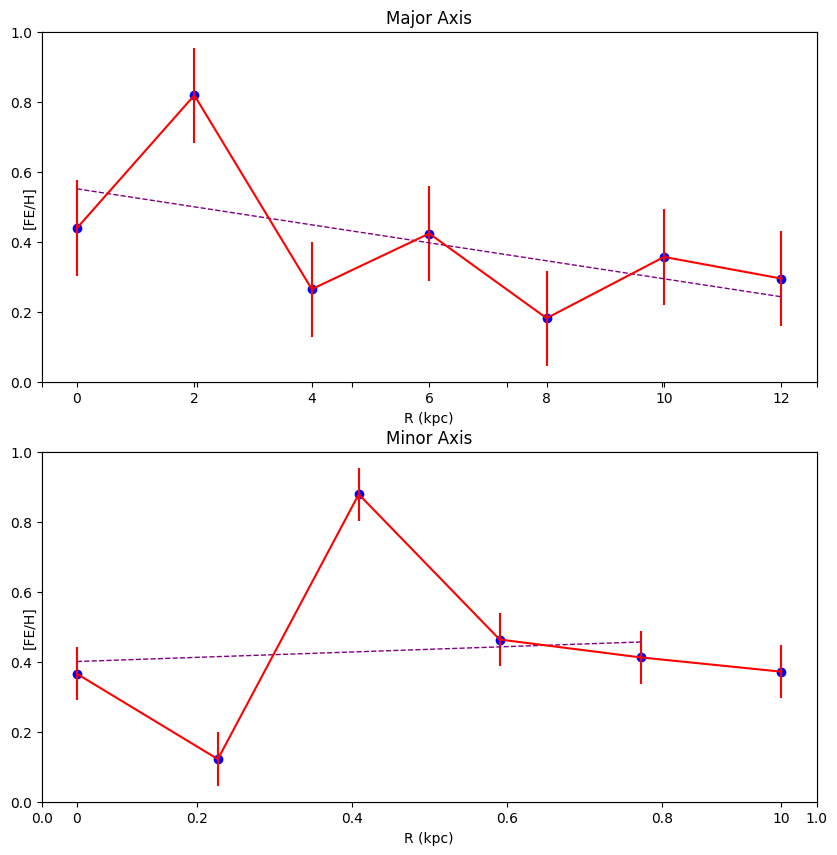

In [15]:
plt.style.use('default')

fig, ax = plt.subplots(2, 1, figsize=(10,10), sharex=True)

a, b = np.polyfit(radial_dist, median_tot_major, 1)

x = np.linspace(0,12,10)

ax1 = fig.add_subplot(211)
ax1.scatter(radial_dist, median_tot_major, color='b')
ax1.errorbar(radial_dist, median_tot_major, yerr=0.1, color='r')
ax1.set_xlabel('R (kpc)')
ax1.set_ylabel('[FE/H]')
ax1.plot(x, a*x+b, color='purple', linestyle='--', linewidth=1)

ax1.set_title('Major Axis')

ax1.set_xscale('linear')
ax1.set_yticks([])

c, d = np.polyfit(radial_dist_a, median_tot_minor, 1)

i = np.linspace(0,8,10)
ax2 = fig.add_subplot(212)
ax2.scatter(radial_dist_a, median_tot_minor, color='b')
ax2.errorbar(radial_dist_a, median_tot_minor, yerr=0.1, color='r')
ax2.set_xlabel('R (kpc)')
ax2.set_ylabel('[FE/H]')
ax2.plot(i,c*i+d, color='purple', linestyle='--', linewidth=1)

ax2.set_title('Minor Axis')

ax2.set_xscale('linear')
ax2.set_xticks([0,10])
ax2.set_yticks([])


plt.savefig('Actual.png')

In [16]:
#24kpc*tangent(1 deg) = opposite angle of 1 degree = 0.42 (linear distance)
#Major axis 
mean_tot_major = [major00_mean+major04_mean+major06_mean+major08_mean,
                   major10_mean+major12_mean]
mean_tot_minor = [minor_01_mean+minor_02_mean+minor_05_mean+minor_m_01_mean+
                    minor_m_02_mean+minor_m_03_mean] 

#slope, intercept = np.polyfit(radial_dist, median_tot_major, 1)
#t = slope*0.42
#i, l = np.polyfit(radial_dist_a, median_tot_minor, 1)
#z = i*0.42
#print(t,'kpc along major axis')
#print(z, 'kpc along minor axis')


In [17]:
u =(-0.63,-0.23,-0.65,-1.06,0.02,-0.81,-1.13,
           -0.38,-0.67,-0.78,-0.59,-1.10,-0.62,-0.56,-1.08,-0.98,
-0.97,-0.70,-0.49,-0.04,0.00,-0.99,-0.72,-0.65,-0.55,
-0.39,-0.82,-0.95,-0.92,-1.06,-1.32,-0.70,-1.26,-1.04,-0.96,
           -1.15,-1.35,-0.90,-0.91,-1.34)
r=statistics.mean(u)
#print(h)
print(r)


-0.7857500000000001


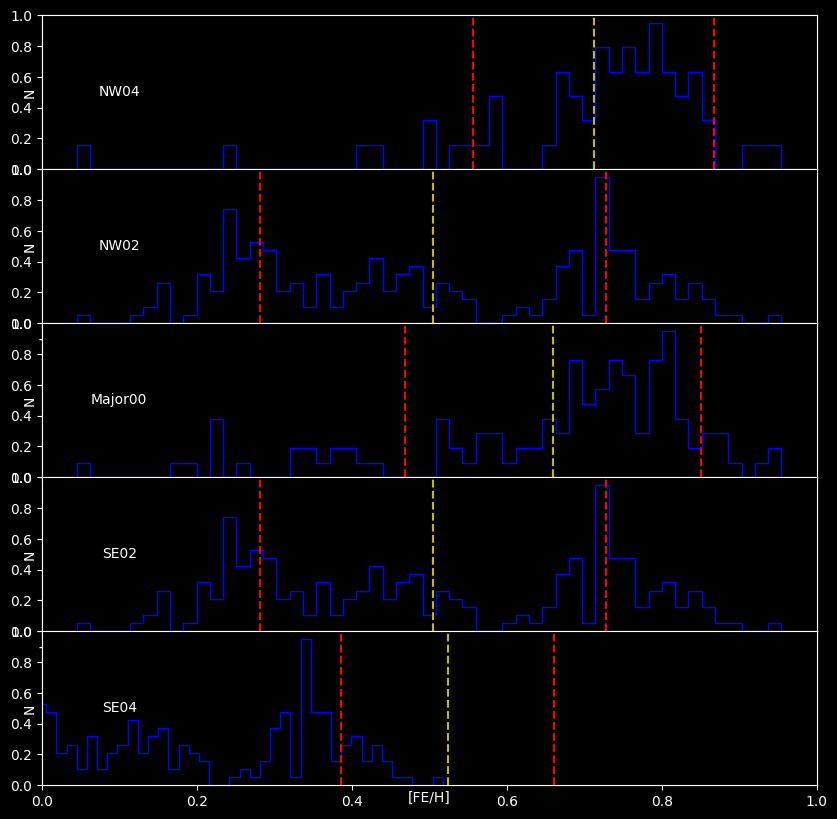

In [18]:
plt.style.use('dark_background')
fig, axes = plt.subplots(5, 1, figsize=(10,10), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax16 = fig.add_subplot(5,1,1)
ax16.hist(NW4,bins=53, histtype='step', color='b')
ax16.text(0.1, 0.5, 'NW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax16.transAxes)
ax16.set_ylabel('N')
ax16.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(NW4)

plt.axvline(NW_04_mean, c='y', linestyle='dashed')
plt.axvline(NW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_04_mean + sd, c='r', linestyle='dashed')
####################################################################################
ax14 = fig.add_subplot(5,1,2)
ax14.hist(NW2,bins=53, histtype='step', color='b')
ax14.text(0.1, 0.5, 'NW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax14.transAxes)
ax14.set_ylabel('N')
ax14.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(NW2)

plt.axvline(NW_02_mean, c='y', linestyle='dashed')
plt.axvline(NW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NW_02_mean + sd, c='r', linestyle='dashed')
##################################################################################################

ax7 = fig.add_subplot(5,1,3)
ax7.hist(m00,bins=53, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')
ax7.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#######################################################################################
ax19 = fig.add_subplot(5,1,4)
ax19.hist(SE2,bins=53, histtype='step', color='b')
ax19.text(0.1, 0.5, 'SE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax19.transAxes)
ax19.set_ylabel('N')
ax19.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(SE2)

plt.axvline(SE_02_mean, c='y', linestyle='dashed')
plt.axvline(SE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_02_mean + sd, c='r', linestyle='dashed')
###################################################################################################

ax20 = fig.add_subplot(5,1,5)
ax20.hist(SE2,bins=53, histtype='step', color='b')
ax20.text(0.1, 0.5, 'SE04', 
         horizontalalignment='center', verticalalignment='center', transform=ax20.transAxes)
ax20.set_ylabel('N')
ax20.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(SE4)

plt.axvline(SE_04_mean, c='y', linestyle='dashed')
plt.axvline(SE_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SE_04_mean + sd, c='r', linestyle='dashed')
##################################################################################################

ax20.set_xlim(-1, 1) 
ax20.set_xticks([])


ax16.set_yticks([])
ax14.set_yticks([])
ax7.set_yticks([])
ax19.set_yticks([])
ax20.set_yticks([])

plt.show()


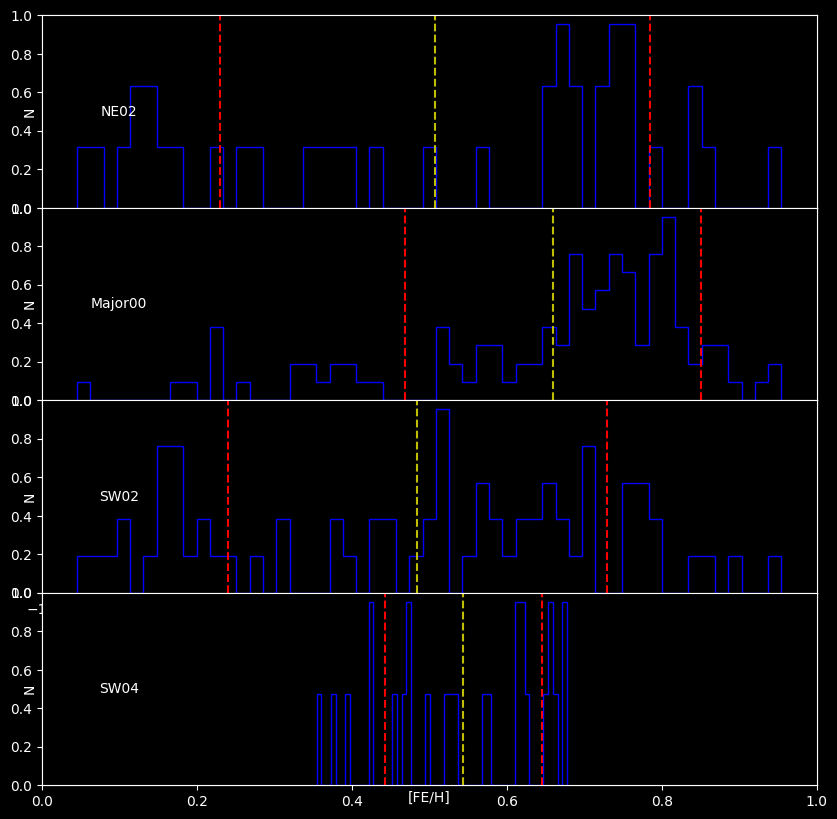

In [19]:
plt.style.use('dark_background')
fig, axes = plt.subplots(4, 1, figsize=(10,10), sharex=1)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax18 = fig.add_subplot(4,1,1)
ax18.hist(NE2,bins=53, histtype='step', color='b')
ax18.text(0.1, 0.5, 'NE02', 
         horizontalalignment='center', verticalalignment='center', transform=ax18.transAxes)
ax18.set_ylabel('N')
ax18.set_xlabel('[FE/H]')
#standard deviatian and mean
sd = statistics.stdev(NE2)

plt.axvline(NE_02_mean, c='y', linestyle='dashed')
plt.axvline(NE_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(NE_02_mean + sd, c='r', linestyle='dashed')

###########################################################################
ax7 = fig.add_subplot(4,1,2)
ax7.hist(m00,bins=53, histtype='step', color='b')
ax7.text(0.1, 0.5, 'Major00', 
         horizontalalignment='center', verticalalignment='center', transform=ax7.transAxes)
ax7.set_ylabel('N')
ax7.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(m00)

plt.axvline(major00_mean, c='y', linestyle='dashed')
plt.axvline(major00_mean - sd, c='r', linestyle='dashed')
plt.axvline(major00_mean+ sd, c='r', linestyle='dashed')
#############################################################
ax15 = fig.add_subplot(4,1,3)
ax15.hist(SW2,bins=53, histtype='step', color='b')
ax15.text(0.1, 0.5, 'SW02', 
         horizontalalignment='center', verticalalignment='center', transform=ax15.transAxes)
ax15.set_ylabel('N')
ax15.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(SW2)

plt.axvline(SW_02_mean, c='y', linestyle='dashed')
plt.axvline(SW_02_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_02_mean + sd, c='r', linestyle='dashed')

#################################################################################################
ax17 = fig.add_subplot(4,1,4)
ax17.hist(SW4,bins=53, histtype='step', color='b')
ax17.text(0.1, 0.5, 'SW04', 
         horizontalalignment='center', verticalalignment='center', transform=ax17.transAxes)
ax17.set_ylabel('N')
ax17.set_xlabel('[FE/H]')

#standard deviatian and mean
sd = statistics.stdev(SW4)

plt.axvline(SW_04_mean, c='y', linestyle='dashed')
plt.axvline(SW_04_mean - sd, c='r', linestyle='dashed')
plt.axvline(SW_04_mean + sd, c='r', linestyle='dashed')
#################################################################################################

ax17.set_xlim(-1, 1) 
ax17.set_xticks([])

ax18.set_yticks([])
ax17.set_yticks([])
ax7.set_yticks([])
ax15.set_yticks([])

plt.show()



-0.39750471375 -1.4904803130000002 -0.39750471374999974 -1.4904803129999997


C:\Users\katel\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


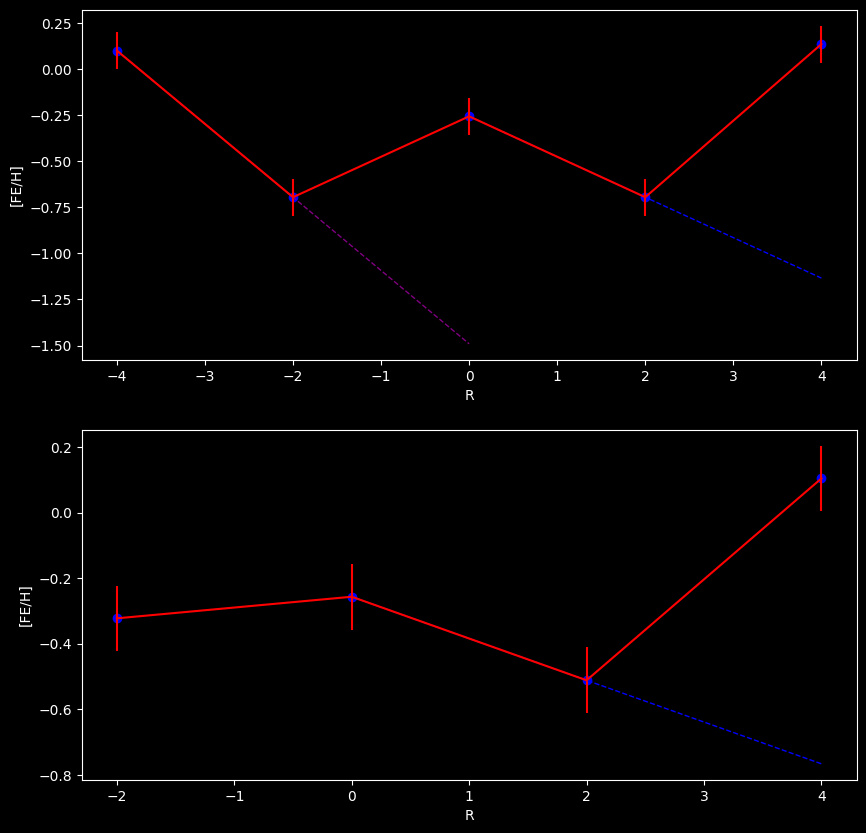

In [20]:
from scipy.optimize import curve_fit
def linear(x,a,b):
    return a*x + b
SW_04_median = np.median(SW4)
NW_04_median = np.median(NW4)
SE_04_median = np.median(SE4)
NE_02_median = np.median(NE2)
SW_02_median = np.median(SW2)
NW_02_median = np.median(NW2)
SE_02_median = np.median(SE2)

w2 = [SE_04_median,SE_02_median,major00_median, NW_02_median,NW_04_median]
v2 = [NE_02_median, major00_median, SW_02_median,SW_04_median]

radial_dist_c = [-4,-2,0, 2, 4 ]
radial_dist_d = [-2,0,2,4]

plt.style.use('dark_background')

fig = plt.figure(figsize=(10,10))

a1, b1 = np.polyfit(radial_dist_c[0:2], w2[0:2], 1)
a2, b2 = np.polyfit(radial_dist_c[2:4], w2[2:4], 1)

temp_sig = [0.1,0.1,0.1,0.1]
param, param_cov = curve_fit(linear, radial_dist_c[0:2],w2[0:2],sigma=temp_sig[0:2])
a3,b3 = param[0],param[1]
print(a3,b3,a1,b1)
x1 = np.linspace(-4,0,10)
x2 = np.linspace(0,4,10)

ax22 = fig.add_subplot(211)
ax22.scatter(radial_dist_c, w2, color='b')
ax22.errorbar(radial_dist_c, w2, yerr=0.1, color='r')
ax22.set_xlabel('R')
ax22.set_ylabel('[FE/H]')
ax22.plot(x1,  a1*x1+b1, color='purple', linestyle='--', linewidth=1)
ax22.plot(x2,  a2*x2+b2, color='b', linestyle='--', linewidth=1)

#ax22.set_xscale('linear')
#ax22.set_yticks([])

#c1, d1 = np.polyfit(radial_dist_d[0:1], v2[0:1], 1)
c2, d2 = np.polyfit(radial_dist_d[1:3], v2[1:3], 1)

x3 = np.linspace(-4,0,10)
x4 = np.linspace(0,4,10)


ax21 = fig.add_subplot(212)
ax21.scatter(radial_dist_d, v2, color='b')
ax21.errorbar(radial_dist_d, v2, yerr=0.1, color='r')
ax21.set_xlabel('R')
ax21.set_ylabel('[FE/H]')
#ax21.plot(x3,c1*x3+d1, color='purple', linestyle='--', linewidth=1)
ax21.plot(x4,c2*x4+d2, color='blue', linestyle='--', linewidth=1)


#ax21.set_xscale('linear')
#ax21.set_yticks([])




In [23]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(10,10))

a1, b1 = np.polyfit(radial_dist_c[0:2], w[0:2], 1)
a2, b2 = np.polyfit(radial_dist_c[2:4], w[2:4], 1)

x1 = np.linspace(-4,0,10)
x2 = np.linspace(0,4,10)

ax22 = fig.add_subplot(211)
ax22.scatter(radial_dist_c, w, color='b')
ax22.errorbar(radial_dist_c, w, yerr=0.1, color='r')
ax22.set_xlabel('R')
ax22.set_ylabel('[FE/H]')
ax22.plot(x1,  a1*x1+b1, color='purple', linestyle='--', linewidth=1)
ax22.plot(x2,  a2*x2+b2, color='b', linestyle='--', linewidth=1)



NameError: name 'w' is not defined

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.style.use('dark_background')

fig = plt.figure(figsize=(10,10))

c1, d1 = np.polyfit(radial_dist_d[0:1], v[0:1], 1)
c2, d2 = np.polyfit(radial_dist_d[1:3], v[1:3], 1)

x3 = np.linspace(-4,0,10)
x4 = np.linspace(0,4,10)


ax21 = fig.add_subplot(212)
ax21.scatter(radial_dist_d, v, color='b')
ax21.errorbar(radial_dist_d, v, yerr=0.1, color='r')
ax21.set_xlabel('R')
ax21.set_ylabel('[FE/H]')
ax21.plot(x3,c1*x3+d1, color='purple', linestyle='--', linewidth=1)
ax21.plot(x4,c2*x4+d2, color='blue', linestyle='--', linewidth=1)

